<a href="https://colab.research.google.com/github/FedericoMz/DM2-FMAProject/blob/main/KNN_%26_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



# Preparazione

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import pydotplus
from sklearn import tree
from IPython.display import Image

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from imblearn.over_sampling import SMOTE, SMOTENC

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from collections import Counter


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#df = pd.read_csv("DM_dfTrain.csv", skipinitialspace=True, sep=',')
#dfTest = pd.read_csv("DM_dfTest.csv", skipinitialspace=True, sep=',')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NeoNoOutTuttoNumeri.csv', skipinitialspace=True, na_values='?', keep_default_na=True)
#dfTest = pd.read_csv("TestDef.csv", skipinitialspace=True, sep=',')



In [ ]:
df.info(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4263 non-null   int64  
 1   album_title          4263 non-null   object 
 2   track_duration       4263 non-null   int64  
 3   track_listens        4263 non-null   float64
 4   acousticness         1120 non-null   float64
 5   danceability         1120 non-null   float64
 6   energy               1120 non-null   float64
 7   instrumentalness     1120 non-null   float64
 8   liveness             1120 non-null   float64
 9   speechiness          1120 non-null   float64
 10  tempo                1120 non-null   float64
 11  valence              1120 non-null   float64
 12  artist_discovery     1120 non-null   float64
 13  artist_familiarity   1120 non-null   float64
 14  artist_hotttnesss    1120 non-null   float64
 15  song_currency        1120 non-null   f

In [ ]:
#eliminiamo il solito Unnamed, album title e favorites (che sballerebbe il classificatore)
del df["Unnamed: 0"]
del df["album_favorites"]
del df["album_title"]



In [ ]:
#eliminiamo le feature di echonest
del df["acousticness"]
del df ["danceability"]
del df ["energy"]
del df ["instrumentalness"]
del df ["liveness"]
del df ["speechiness"]
del df ["tempo"]
del df ["valence"]
del df ["artist_familiarity"]
del df ["artist_discovery"]  
del df ["artist_hotttnesss"]  
del df ["song_currency"]     
del df ["song_hotttnesss"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_duration       4263 non-null   int64  
 1   track_listens        4263 non-null   float64
 2   artist_favorites     4263 non-null   int64  
 3   Classical            4263 non-null   int64  
 4   Blues                4263 non-null   int64  
 5   Country              4263 non-null   int64  
 6   Easy Listening       4263 non-null   int64  
 7   Electronic           4263 non-null   int64  
 8   Experimental         4263 non-null   int64  
 9   Folk                 4263 non-null   int64  
 10  Hip-Hop              4263 non-null   int64  
 11  Instrumental         4263 non-null   int64  
 12  International        4263 non-null   int64  
 13  Jazz                 4263 non-null   int64  
 14  Old-Time / Historic  4263 non-null   int64  
 15  Pop                  4263 non-null   i

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
from collections import Counter
z = df["Rock"]
Counter(z)


Counter({0: 2748, 1: 1515})

In [ ]:
class_name = 'popularity'

attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0., 1.]), array([2827,  157])),
 (array([0., 1.]), array([1212,   67])))

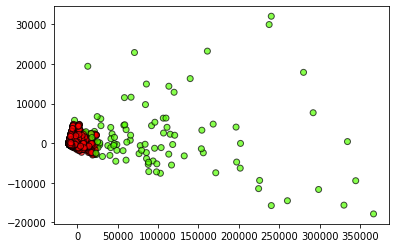

In [ ]:
from sklearn.decomposition import PCA
X_train.shape
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pca.shape
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = dict()


In [ ]:
from sklearn.model_selection import train_test_split

attributes = [col for col in df.columns if col != 'popularity']
X = df[attributes].values
y = df['popularity']

X_train, X_VAL, y_train, y_VAL = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#attributesTest = [col for col in dfTest.columns if col != 'popularity']
#X_test = dfTest[attributesTest].values
#y_test = dfTest['popularity']

X_OG = X_train
y_OG = y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def albero (X_train, y_train, LEAF, DEPTH, SPLIT, CRIT):

    clf = DecisionTreeClassifier(criterion=CRIT, max_depth=DEPTH, min_samples_split=SPLIT, min_samples_leaf=LEAF, random_state = 42)
    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_VAL = clf.predict(X_VAL)
    y_pred_tr = clf.predict(X_train)
    
    print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
    print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
    fpr, tpr, _ = roc_curve(y_train, y_pred_tr)
    roc_auc = auc(fpr, tpr)
    print('Train Roc', roc_auc)
    print()
        
    print('Validation Accuracy %s' % accuracy_score(y_VAL, y_pred_VAL))
    print('Validation F1-score %s' % f1_score(y_VAL, y_pred_VAL, average=None))
    fpr, tpr, _ = roc_curve(y_VAL, y_pred_VAL)
    roc_auc = auc(fpr, tpr)
    print('Accu Roc', roc_auc)
    print()
    
    print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
    print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred))
    confusion_matrix(y_test, y_pred)

    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, y_test, cmap = "GnBu")

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)

    roc_auc = roc_auc_score(y_test, y_pred, average=None)

    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20) 
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.show()

    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=attributes,
                                    class_names=['Leave' if x == 1 else 'Remain' for x in clf.classes_],  
                                    filled=True, rounded=True,  
                                    special_characters=True,
                                    max_depth=19)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    print (graph)
    



In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def KNN (X_train, y_train):
    
    X = np.concatenate((X_train, X_test), axis=0)
    y = np.concatenate((y_train, y_test), axis=0)

    clf = KNeighborsClassifier(n_neighbors=20, leaf_size = 10, metric='euclidean')

    scores = cross_val_score(clf, X, y, cv=10)
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

    scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))



In [ ]:
S T O P

SyntaxError: ignored

# KNN & DT


In [ ]:
param_list = { 'min_samples_leaf': list(np.arange(2, 40)),
               'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': list(np.arange(2, 40)),
              "criterion":("gini", "entropy"),
              "min_impurity_decrease": list(np.arange(0, 2))
             }


clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100, random_state = 5)
random_search.fit(X_train, y_train)
report(random_search.cv_results_, n_top=399999)

Model with rank: 1
Mean validation score: 0.986 (std: 0.003)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 3, 'min_impurity_decrease': 0, 'max_depth': 18, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.986 (std: 0.003)
Parameters: {'min_samples_split': 7, 'min_samples_leaf': 2, 'min_impurity_decrease': 0, 'max_depth': 14, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.982 (std: 0.004)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 5, 'min_impurity_decrease': 0, 'max_depth': 13, 'criterion': 'gini'}

Model with rank: 4
Mean validation score: 0.982 (std: 0.003)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 4, 'min_impurity_decrease': 0, 'max_depth': 13, 'criterion': 'gini'}

Model with rank: 5
Mean validation score: 0.976 (std: 0.004)
Parameters: {'min_samples_split': 16, 'min_samples_leaf': 6, 'min_impurity_decrease': 0, 'max_depth': 11, 'criterion': 'gini'}

Model with rank: 6
Mean validation score: 0.976 (std: 0.0

In [ ]:
#albero (X_train, y_train, LEAF, DEPTH, SPLIT, CRIT):

In [ ]:
#cambiare qui poi runnare le prossime 3 celle
split = 15
leaf = 3
depth = 18
crit = 'gini'




Train Accuracy 0.9966395472232048
Train F1-score [0.99662822 0.9966508 ]
Train Roc 0.9966395472232048

Validation Accuracy 0.9577795152462861
Validation F1-score [0.97775947 0.58461538]
Accu Roc 0.7732685581991035

Test Accuracy 0.983580922595778
Test F1-score [0.99131873 0.84892086]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1212
         1.0       0.82      0.88      0.85        67

    accuracy                           0.98      1279
   macro avg       0.91      0.93      0.92      1279
weighted avg       0.98      0.98      0.98      1279

0.9349354711590562


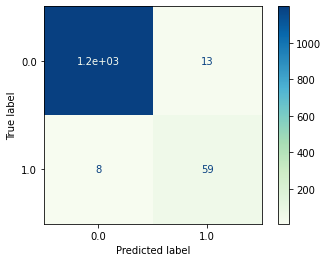

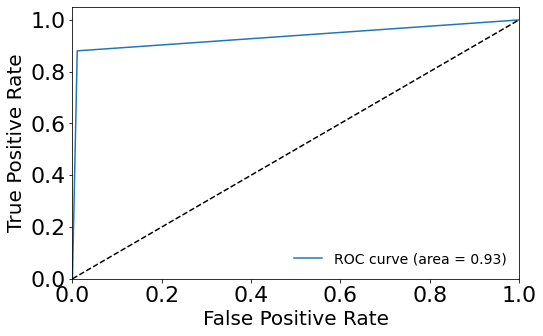

Accuracy: 0.9874 (+/- 0.01)
F1-score: 0.9874 (+/- 0.01)


In [ ]:
clf = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, random_state = 63)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_VAL = clf.predict(X_VAL)
y_pred_tr = clf.predict(X_train)
    
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
fpr, tpr, _ = roc_curve(y_train, y_pred_tr)
roc_auc = auc(fpr, tpr)
print('Train Roc', roc_auc)
print()
        
print('Validation Accuracy %s' % accuracy_score(y_VAL, y_pred_VAL))
print('Validation F1-score %s' % f1_score(y_VAL, y_pred_VAL, average=None))
fpr, tpr, _ = roc_curve(y_VAL, y_pred_VAL)
roc_auc = auc(fpr, tpr)
print('Accu Roc', roc_auc)
print()
    
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap = "GnBu")

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['Leave' if x == 1 else 'Remain' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=19)  
graph = pydotplus.graph_from_dot_data(dot_data)  


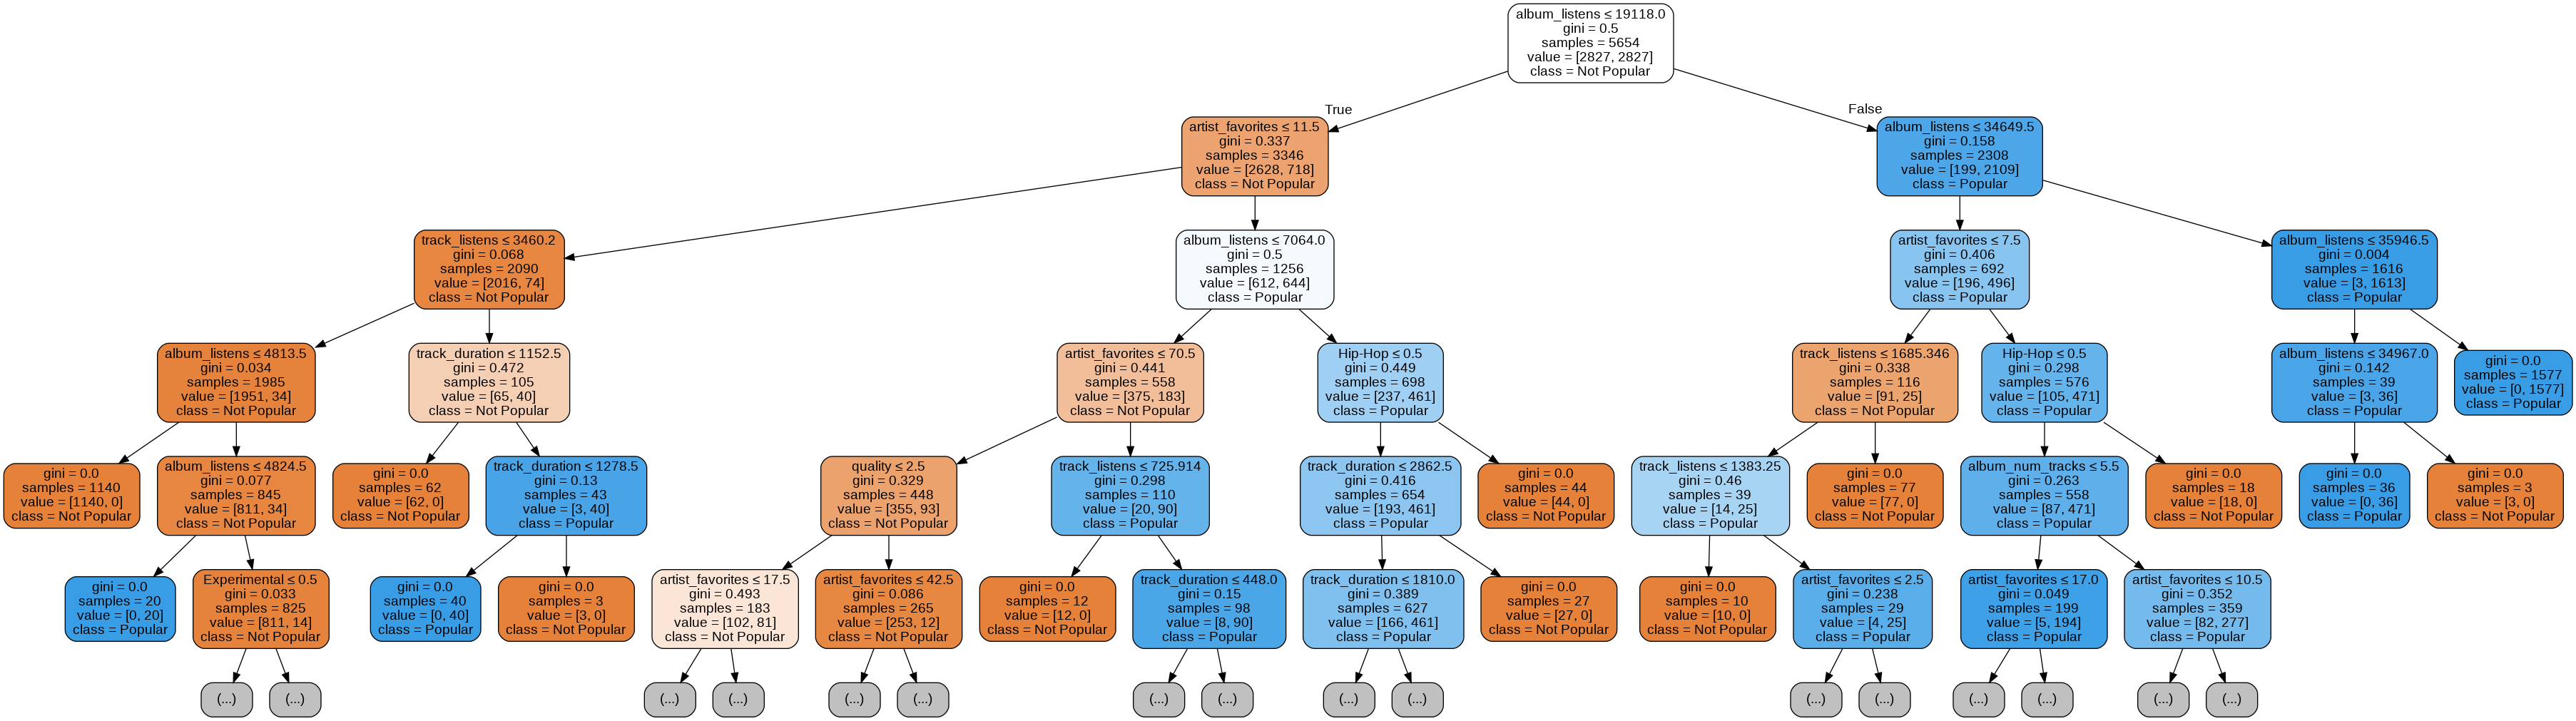

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['Popular' if x == 1 else 'Not Popular' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=5)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

AttributeError: ignored

In [ ]:
KNN (X_train, y_train)

Accuracy: 0.9747 (+/- 0.01)
F1-score: 0.8321 (+/- 0.08)


In [ ]:
KNN (X_OG, y_OG)

Accuracy: 0.9756 (+/- 0.02)
F1-score: 0.8356 (+/- 0.14)


In [ ]:
KNN (X_OG, y_OG)

Accuracy: 0.9475 (+/- 0.00)
F1-score: 0.4865 (+/- 0.00)


In [ ]:
S T O P

SyntaxError: ignored

# Sampling

In [ ]:
#RUS

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_OG, y_OG)
print('Resampled dataset shape %s' % Counter(y_res))

pca = PCA(n_components=2)
pca.fit(X_OG)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

X_train, y_train = X_res, y_res





Resampled dataset shape Counter({0.0: 262, 1.0: 157})


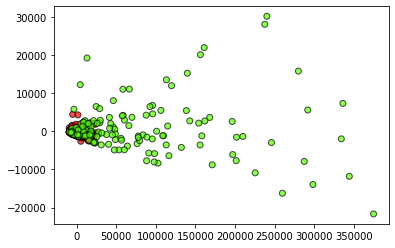

In [ ]:
#CNN

import warnings
warnings.simplefilter("ignore")

cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_OG, y_OG)
print('Resampled dataset shape %s' % Counter(y_res))

pca = PCA(n_components=2)
pca.fit(X_OG)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

X_train, y_train = X_res, y_res

Resampled dataset shape Counter({0.0: 2827, 1.0: 2827})


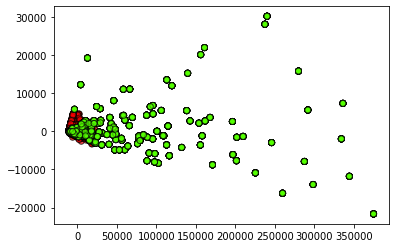

In [ ]:
#ROS

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_OG, y_OG)
print('Resampled dataset shape %s' % Counter(y_res))

pca = PCA(n_components=2)
pca.fit(X_OG)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

X_train, y_train = X_res, y_res

In [ ]:
len(X_train)

5654

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_duration       4263 non-null   int64  
 1   track_listens        4263 non-null   float64
 2   artist_favorites     4263 non-null   int64  
 3   Classical            4263 non-null   int64  
 4   Blues                4263 non-null   int64  
 5   Country              4263 non-null   int64  
 6   Easy Listening       4263 non-null   int64  
 7   Electronic           4263 non-null   int64  
 8   Experimental         4263 non-null   int64  
 9   Folk                 4263 non-null   int64  
 10  Hip-Hop              4263 non-null   int64  
 11  Instrumental         4263 non-null   int64  
 12  International        4263 non-null   int64  
 13  Jazz                 4263 non-null   int64  
 14  Old-Time / Historic  4263 non-null   int64  
 15  Pop                  4263 non-null   i

Resampled dataset shape Counter({0.0: 2827, 1.0: 2827})


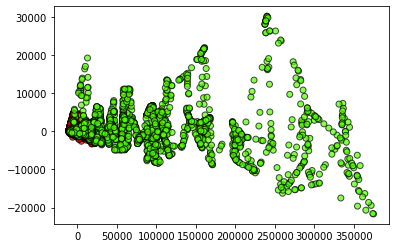

In [ ]:
#SMOTE-NC

sm = SMOTENC(random_state=42, categorical_features = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26]) 
x_smote, y_smote = sm.fit_sample(X_OG, y_OG)

print('Resampled dataset shape %s' % Counter(y_res))

pca = PCA(n_components=2)
pca.fit(X_OG)
X_pca = pca.transform(x_smote)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_smote, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

X_train, y_train = x_smote, y_smote



In [ ]:
#ADASYN (Skywalker)

Resampled dataset shape Counter({1.0: 2841, 0.0: 2827})


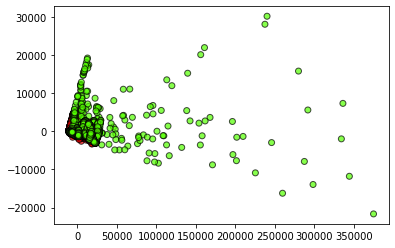

In [ ]:
from imblearn.over_sampling import ADASYN 

ada = ADASYN(random_state=42)

x_ada, y_ada = ada.fit_resample(X_OG, y_OG)

print('Resampled dataset shape %s' % Counter(y_ada))
#Resampled dataset shape Counter({0: 904, 1: 900})

pca = PCA(n_components=2)
pca.fit(X_OG)
X_pca = pca.transform(x_ada)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_ada, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

X_train, y_train = x_ada, y_ada


In [ ]:
S T  O P

#Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def forest (X_train, y_train):
    
    fullX = np.concatenate((X_train, X_test), axis=0)
    fullY = np.concatenate((y_train, y_test), axis=0)


    param_list = {'max_depth': [None] + list(np.arange(2, 50)),
                  'min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100, 150],
                  'min_samples_leaf': [1, 5, 10, 15, 20, 30, 50, 100, 150],
                  'criterion': ['gini', 'entropy'],
                 }

    clf = RandomForestClassifier(n_estimators=90, criterion='gini', max_depth=None, random_state = 42, 
                                 min_samples_split=2, min_samples_leaf=1, class_weight=None)

    random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=70)
    random_search.fit(fullX, fullY)
    report(random_search.cv_results_, n_top=3)
    
    clf = random_search.best_estimator_

    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    y_pred_VAL = clf.predict(X_VAL)
    
    print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
    print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
    fpr, tpr, _ = roc_curve(y_train, y_pred_tr)
    roc_auc = auc(fpr, tpr)
    print('Train Roc', roc_auc)
    print()
        
    print('Validation Accuracy %s' % accuracy_score(y_VAL, y_pred_VAL))
    print('Validation F1-score %s' % f1_score(y_VAL, y_pred_VAL, average=None))
    fpr, tpr, _ = roc_curve(y_VAL, y_pred_VAL)
    roc_auc = auc(fpr, tpr)
    print('Accu Roc', roc_auc)
    print()
    
    print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
    print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred))
    confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)

    roc_auc = roc_auc_score(y_test, y_pred, average=None)
    roc_auc
    
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20) 
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.show()

    scores = cross_val_score(clf, fullX, fullY, cv=10)
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

    scores = cross_val_score(clf, fullX, fullY, cv=10, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, y_test, cmap = "GnBu")

    nbr_features = 15

    tree_feature_importances = clf.feature_importances_
    sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

    y_ticks = np.arange(0, len(sorted_idx))
    fig, ax = plt.subplots()
    plt.barh(y_ticks, tree_feature_importances[sorted_idx])
    plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
    plt.title("Random Forest Feature Importances (MDI)")
    plt.show()

    importance = clf.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))


In [ ]:
forest (X_OG, y_OG)